<a href="https://colab.research.google.com/github/Lexian-6/Pytorch-Tutorial/blob/main/02_Code_along_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import torch


In [ ]:
n_samples=1000
X, y = make_circles(n_samples, random_state=42, noise=0.03)
X[:5]
y[:5]

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
import pandas as pd
circle = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "Label":y})
circle.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


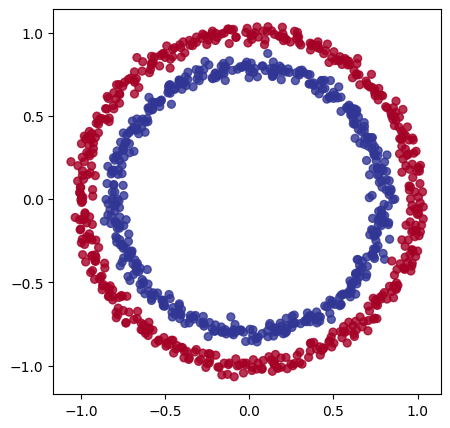

In [ ]:
# @title X1 vs X2

from matplotlib import pyplot as plt
plt.figure(figsize=(5, 5));
plt.scatter(X[:, 0], X[:, 1], s=32, alpha=.8, c=y, cmap=plt.cm.RdYlBu);

In [ ]:

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
from torch import nn
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=5)
    self.layer_2=nn.Linear(in_features=5, out_features=1)
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer_2(self.layer_1(x))


In [ ]:
torch.manual_seed(42)
model_0 = CircleModelV0()
model_0.to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [ ]:
torch.manual_seed(42)
model_0 = nn.Sequential(
  nn.Linear(in_features=2, out_features=5),
  nn.Linear(in_features=5, out_features=1),
).to(device)

In [ ]:
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
  print(untrained_preds[:10])
  print(y_test[:10])

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.0001)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  return (correct / len(y_pred))*100

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
  y_pred_probs = torch.sigmoid(y_logits)
  y_preds = torch.round(y_pred_probs).squeeze()
y_preds

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [ ]:
y_train.shape

torch.Size([800])

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=100

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  y_train_logits = model_0(X_train).squeeze()
  y_train_probs = torch.sigmoid(y_train_logits)
  y_train_labels = torch.round(y_train_probs)

  train_loss = loss_fn(y_train_logits, y_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  if epoch % 10 == 0:
    model_0.eval()
    with torch.inference_mode():
      y_test_logits = model_0(X_test.to(device)).squeeze()
      y_test_probs = torch.sigmoid(y_test_logits)
      y_test_labels = torch.round(y_test_probs)
      test_loss = loss_fn(y_test_logits, y_test)
      test_accuracy = accuracy_fn(y_test, y_test_labels)
      train_accuracy = accuracy_fn(y_train, y_train_labels)
    print(f"On epoch {epoch}, the test loss is {test_loss:.5f} with accuracy of {test_accuracy}, the train loss is {train_loss:.5f} with accuracy of {train_accuracy}")


On epoch 0, the test loss is 0.69739 with accuracy of 50.0, the train loss is 0.69569 with accuracy of 50.0
On epoch 10, the test loss is 0.69728 with accuracy of 50.0, the train loss is 0.69556 with accuracy of 50.0
On epoch 20, the test loss is 0.69717 with accuracy of 50.0, the train loss is 0.69543 with accuracy of 50.0
On epoch 30, the test loss is 0.69706 with accuracy of 50.0, the train loss is 0.69532 with accuracy of 50.0
On epoch 40, the test loss is 0.69695 with accuracy of 50.0, the train loss is 0.69520 with accuracy of 50.0
On epoch 50, the test loss is 0.69685 with accuracy of 50.0, the train loss is 0.69509 with accuracy of 50.0
On epoch 60, the test loss is 0.69675 with accuracy of 50.0, the train loss is 0.69498 with accuracy of 50.0
On epoch 70, the test loss is 0.69665 with accuracy of 50.0, the train loss is 0.69488 with accuracy of 50.0
On epoch 80, the test loss is 0.69656 with accuracy of 50.0, the train loss is 0.69478 with accuracy of 50.0
On epoch 90, the tes

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper function file already exists.")
else:
  print("Downloading helper functions.")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", 'wb') as f:
    f.write(request.content)



In [ ]:
from helper_functions import plot_decision_boundary, plot_predictions

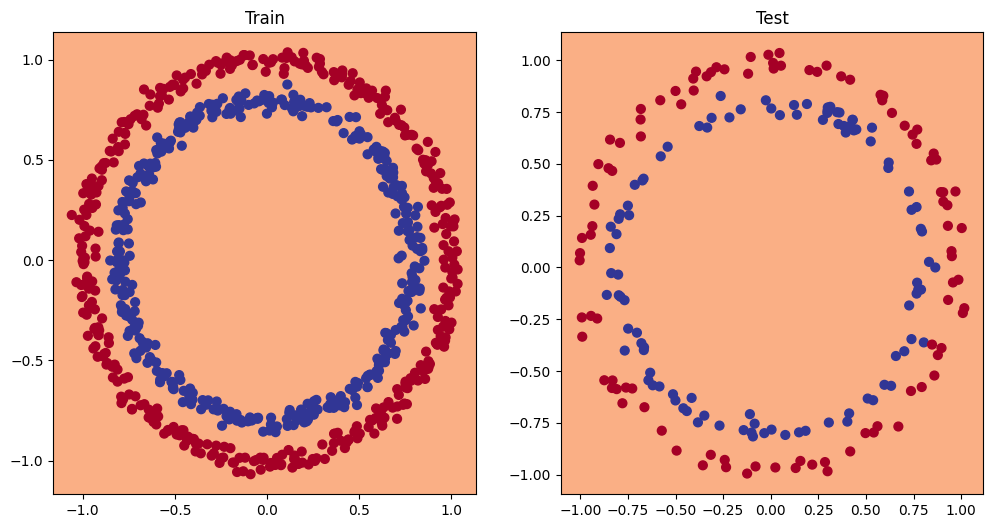

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [ ]:
torch.manual_seed(42)
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=100)
    self.layer_tanh=nn.Tanh()
    self.layer_2=nn.Linear(in_features=100, out_features=100)
    self.layer_relu=nn.ReLU()
    self.layer_3=nn.Linear(in_features=100, out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_tanh(self.layer_2(self.layer_relu(self.layer_1(x)))))
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=100, bias=True)
  (layer_tanh): Tanh()
  (layer_2): Linear(in_features=100, out_features=100, bias=True)
  (layer_relu): ReLU()
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.1)

In [ ]:
epochs = 1000

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()

  train_loss = loss_fn(y_logits, y_train)

  optimizer.zero_grad()

  train_loss.backward()

  optimizer.step()

  if epoch % 100 == 0:
    model_1.eval()
    with torch.inference_mode():
      train_pred = torch.round(torch.sigmoid(y_logits))
      test_pred = torch.round(torch.sigmoid(model_1(X_test).squeeze()))
      test_loss = loss_fn(model_1(X_test).squeeze(), y_test)
      print(f"With epoch {epoch}, train accuracy is {accuracy_fn(train_pred, y_train):.2f}",
      f"with a loss of {train_loss:.5f}， test accuracy is {accuracy_fn(test_pred, y_test):.2f}, with a loss of {test_loss:.5f}")


With epoch 0, train accuracy is 46.50 with a loss of 0.69635， test accuracy is 50.00, with a loss of 1.49235
With epoch 100, train accuracy is 100.00 with a loss of 0.00119， test accuracy is 100.00, with a loss of 0.00688
With epoch 200, train accuracy is 100.00 with a loss of 0.00060， test accuracy is 100.00, with a loss of 0.00449
With epoch 300, train accuracy is 100.00 with a loss of 0.00037， test accuracy is 100.00, with a loss of 0.00369
With epoch 400, train accuracy is 100.00 with a loss of 0.00025， test accuracy is 100.00, with a loss of 0.00329
With epoch 500, train accuracy is 100.00 with a loss of 0.00018， test accuracy is 100.00, with a loss of 0.00303
With epoch 600, train accuracy is 100.00 with a loss of 0.00014， test accuracy is 100.00, with a loss of 0.00279
With epoch 700, train accuracy is 100.00 with a loss of 0.00011， test accuracy is 100.00, with a loss of 0.00242
With epoch 800, train accuracy is 100.00 with a loss of 0.00008， test accuracy is 100.00, with a los

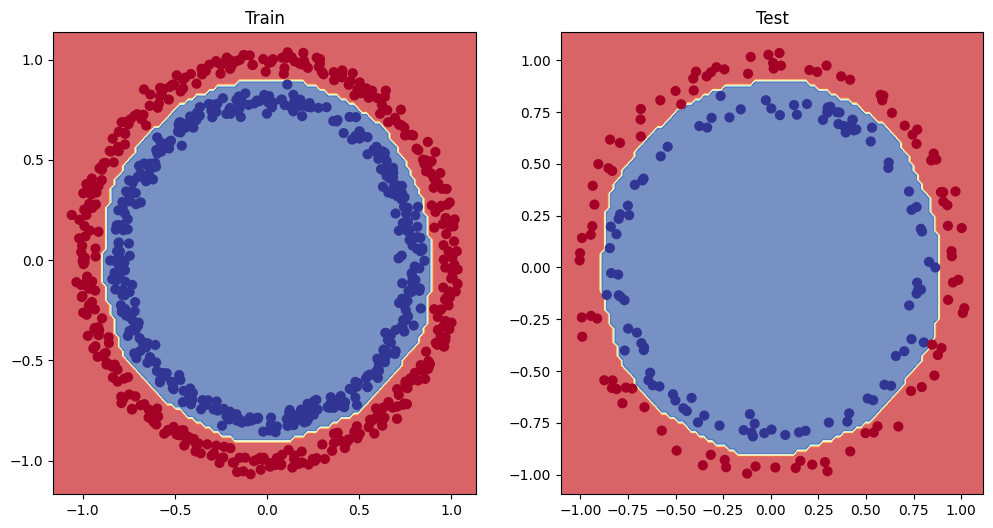

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [ ]:
A = torch.arange(-10, 10, 1)

In [ ]:
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [ ]:
torch.relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
def relu(x:torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

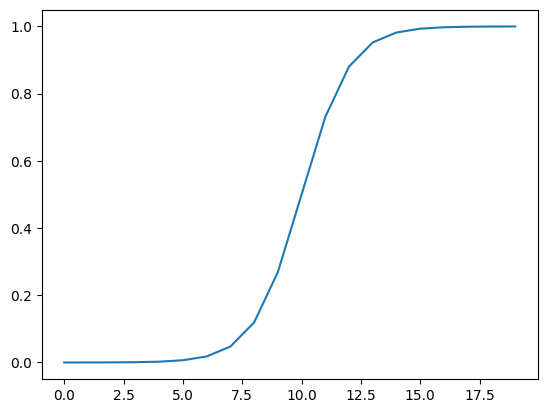

In [ ]:
plt.plot(torch.sigmoid(A))

''

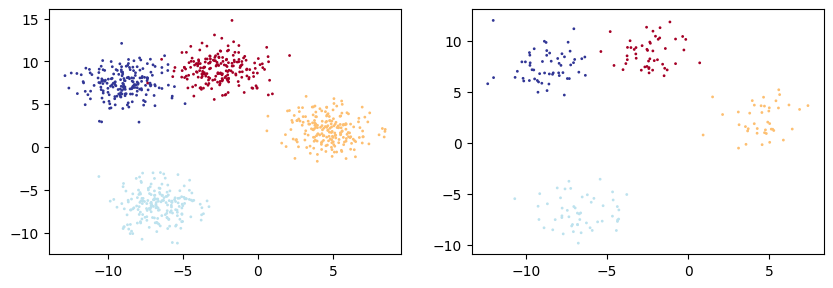

In [ ]:
from sklearn.datasets import make_blobs
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob,y_blob = make_blobs(n_samples = 1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.scatter(X_b_train[:, 0], X_b_train[:, 1], s=1, c=y_b_train, cmap="RdYlBu")
plt.subplot(2, 2, 2)
plt.scatter(X_b_test[:, 0], X_b_test[:, 1], s=1, c=y_b_test, cmap="RdYlBu")
;

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.
    Args:
      input_features(int): Number of input features to the model.
    Returns:
    Example:
    """
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Linear(in_features=input_features, out_features=hidden_units),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units, out_features=hidden_units),
      nn.Tanh(),
      nn.Linear(in_features=hidden_units, out_features=output_features),
    )
  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.layer_stack(x)

model_2 = BlobModel(input_features=2, output_features=4).to(device)


In [ ]:
X_b_train.shape, y_b_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.], device='cuda:0'))

In [ ]:
torch.unique(y_b_train)

tensor([0., 1., 2., 3.], device='cuda:0')

In [ ]:
# Loss function for multiclass classification

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_2.parameters(), lr=0.001)

In [ ]:
X_b_train=X_b_train.to(device)
X_b_test=X_b_test.to(device)
y_b_train=y_b_train.to(device)
y_b_test=y_b_test.to(device)

In [ ]:
model_2.eval()
with torch.inference_mode():
  y_logits = model_2(X_b_test)
y_logits[:10]

tensor([[-0.3832, -0.1393,  0.0653, -0.3123],
        [-0.5540,  0.1671,  0.4915, -0.4950],
        [-0.0963,  0.5876,  0.4196,  0.3627],
        [-0.2262, -0.0008,  0.0685, -0.1175],
        [-0.5050, -0.0297,  0.1798, -0.4848],
        [-0.5255,  0.1724,  0.5128, -0.4577],
        [-0.0584,  0.6168,  0.3984,  0.4499],
        [-0.5804,  0.0968,  0.2999, -0.5730],
        [-0.1482,  0.5317,  0.4358,  0.2571],
        [-0.5567,  0.0615,  0.2533, -0.5439]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred

tensor([2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1,
        1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
        1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2,
        1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2,
        2, 2, 1, 2, 2, 2, 1, 2], device='cuda:0')

In [ ]:
y_logits.shape

torch.Size([200, 4])

In [ ]:
a=torch.tensor([[1, 0],[1,0]])

In [ ]:
a=a.type(torch.float)

In [ ]:
torch.softmax(a, dim=0)

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000]])

In [ ]:
y_b_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.], device='cuda:0')

In [ ]:
def new_accuracy_fn(train:torch.Tensor, test:torch.Tensor):
  return (torch.sum(train==test).item() / len(train))*100
new_accuracy_fn(y_pred, y_b_test)

2.5

In [ ]:
epochs = 10000
for epoch in range(epochs):
  model_2.train()

  y_logits = model_2(X_b_train)

  loss = loss_fn(y_logits, y_b_train.long())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  if epoch % 1000 == 0:
    with torch.inference_mode():
      model_2.eval()
      test_logits = model_2(X_b_test)
      train_loss = loss
      test_loss = loss_fn(test_logits, y_b_test.long())
      train_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
      test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)
      train_acc = new_accuracy_fn(train_pred, y_b_train)
      test_acc = new_accuracy_fn(test_pred, y_b_test)
      print(f"Epoch {epoch}: train loss and accuracy:{train_loss:.5f}, {train_acc:.2f}, test loss and accuracy:{test_loss:.5f}, {test_acc:.2f}")

Epoch 0: train loss and accuracy:1.57668, 7.25, test loss and accuracy:1.59068, 4.00
Epoch 1000: train loss and accuracy:0.04581, 99.50, test loss and accuracy:0.03694, 99.50
Epoch 2000: train loss and accuracy:0.02156, 99.38, test loss and accuracy:0.01043, 100.00
Epoch 3000: train loss and accuracy:0.01673, 99.38, test loss and accuracy:0.00516, 100.00
Epoch 4000: train loss and accuracy:0.01489, 99.50, test loss and accuracy:0.00339, 100.00
Epoch 5000: train loss and accuracy:0.01387, 99.62, test loss and accuracy:0.00263, 100.00
Epoch 6000: train loss and accuracy:0.01325, 99.62, test loss and accuracy:0.00230, 100.00
Epoch 7000: train loss and accuracy:0.01283, 99.62, test loss and accuracy:0.00218, 100.00
Epoch 8000: train loss and accuracy:0.01245, 99.75, test loss and accuracy:0.00215, 100.00
Epoch 9000: train loss and accuracy:0.01204, 99.75, test loss and accuracy:0.00229, 100.00


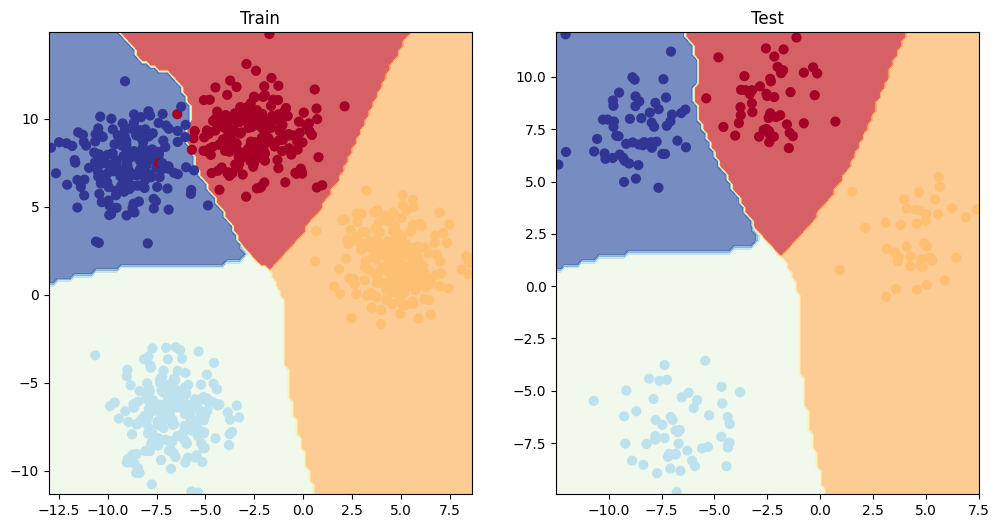

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2, X_b_train, y_b_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2, X_b_test, y_b_test)

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="MULTICLASS", num_classes=4).to(device)

torchmetric_accuracy(train_pred, y_b_train)

tensor(0.9975, device='cuda:0')